# Compressed Sensing : Final Project - Semidefinite Relaxations for Integer Programming

### Rémy Deshayes and Éric Lavergne



*March 25th 2021*

Our project is based on the work of Franz Rendl in *Semidefinite Relaxations for Integer Programming*. We summarized the main ideas of the article and implemented some of the solutions described in the survey for the two classical problems of maxcut and graph coloring.

The first part *1. Approachs for Integer Programming* quickly introduces the approaches used in this field. The second part *2. The basics of SemiDefinite Optimization* outlines the main ideas of SDP programming. The third part *3. Famous (COP), SDP relaxation and hyperplane rounding* considers the examples of two classical problems, Max-Cut and Graph coloring, that can be solved thanks to SDP programming. Once a solution of the SDP relaxation has been obtained, the hyperplane rounding algorithm is used to obtain a good solution in the initial space. Finally, in the last part *4. Interior Points methods for SDP programming and more*, we describe methods to compute SDP problems.

Packages

In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import time

This notebook involves many graph problems and then some drawings are done:

In [ ]:
def draw_graph_from_np(A):
    """
    draw a graph from its adjacency matrix A
    """
    G = nx.from_numpy_matrix(np.matrix(A))

    nx.draw(G, with_labels=True, font_weight='bold')

    plt.show()

# 1  Approachs for Integer Progamming

## 1.1 The origins

Integer Programming consists of optimization problems where some variables are restricted to be integers. This area of study is closely related to Combinatorial Optimization, and we will study in this report different Combinatorial Optimisation problems that can be expressed in the form of integer programming.

Let us recall the general form of a Combinatorial Optimization Problem \eqref{eqn: cop} :

- $E$ is a finite set, each $e \in E$ has a given cost $c_e \in \mathbb{N}$
- $\mathscr{F}$ is a finite family of subsets of $E$ denoting the set of feasible solutions of \eqref{eqn: cop}

The cost function for $F \in \mathscr{F}$ is given by : $$ c(F) := \sum\limits_{e \in F} c_e $$ 

Now, the \eqref{eqn: cop} problem is about finding a feasible solution $F$ of minimum cost : 
\begin{equation}
\tag{COP}
\label{eqn: cop}
z^* = \min\{ c(F) : F \in \mathscr{F} \}
\end{equation}

To solve \eqref{eqn: cop} one can use the *Polyhedral Approach*. This approach is based on assigning a characteristic vector to each $F \in \mathscr{F}$, $x_F \in \{ 0,1 \}^n$ where $(x_F)_e = 1$ if and only if $e \in F$.     
Now, let us introduce $P := \text{conv}\{ x_F : F \in \mathscr{F} \}$, the convex hull of the characteristic vectors of feasible solutions.

This allows to write \eqref{eqn: cop} as the following linear program \eqref{eqn: cop_v2} 
\begin{equation} 
    \tag{COP V2}
    \label{eqn: cop_v2}
    z^* = \min\{ c^T x_F : F \in \mathscr{F} \} = \min\{ c^T x : x \in P \}
\end{equation}

For the past five decades or so, NP-hard integer optimization problems have been widely approached with this technique. Indeed, a partial description of $P$ can be exploited by renowned linear programming algorithmic methods and has often yielded good results.        
However, the approach \eqref{eqn: cop_v2} have given some pretty poor results for famous NP-hard problems such as Max-Cut.

## 1.2 A new approach : matrix liftings

To overcome this disappointment one can use the set of matrices of the form $\mathscr{M} := \text{conv}\{ x_F x_F^T : F \in \mathscr{F} \} $ instead of $P$ defined in approach \eqref{eqn: cop_v2}.     

The underlying intuition is based on the fact that any quadratic constraint on $x \in P$ translates into a linear constraint on $X \in \mathscr{M}$ (e.g $x_ix_j = 0$ becomes $x_{ij} = 0$). Same goes with the cost function. In addition $X \in \mathscr{M}$ is positive semidefinite.          

A Major consequence of the switch is that this relaxation is conveying a problem lying in the space of symmetric matrices $\mathscr{S}_n$ instead of the traditional \eqref{eqn: cop} space $\mathbb{R}^n$             

Finally, if we add the condition that $\mathscr{M}$ is contained in the cone of positive semidefinite matrices we end up having semidefinite relaxations as approximations of our initial \eqref{eqn: cop}.

# 2  The basics of Semidefinite Optimization            


In part 3, we will dive into more details about the SDP relaxation of a few famous (COP), notably the Max-Cut for which (COP V2) modeling led to poor results and motivated the need to introduce the method seen in 1.2.        

But before that, let us recall the general form of the \eqref{eqn: sdp} program :

\begin{equation}
    \tag{SDP}
    \label{eqn: sdp}
    z_p = \inf \{ \langle C, X \rangle : \langle A_i, X \rangle = b_i, i = 1, \dots, m, X \succeq 0 \}
\end{equation}

where $C, A_1, \dots, A_m$ are symmetric of size $n$ and $b \in \mathbb{R}^m$                 

Noting that \eqref{eqn: sdp} is a convex optimization problem - indeed, we are optimizing a convex objective function under convex constraints -, let us make a quick comment about the duality gap here.          

In general, strong duality (solutions of the primal $z_p$ and dual $z_d$ problems are equal) is not guaranteed. Here the duality gap will be equal to zero if *Slater's* condition hold for the primal problem.         

The *Slater's* condition states that strong duality holds if there exists a strictly feasible $X^*$, in other word all constraints are satisfied and the nonlinear constraints are satisfied with strict inequalities.        
Thus, \ref{eqn: sdp} satisfies the *Slater's* condition if there exists $X \succ 0$ such that $A(X) = b$ where $A(X)$ is the linear operator mapping matrices into $\mathbb{R}^m$ as follows $A(X)_i = \langle A_i, X \rangle$      

Finally, we note that if $z_d^* > - \infty$, the dual problem is feasible (see \[Boyd\] part 5.2.3 "Strong duality and Slater’s constraint qualification" pages 227-228)       

Fortunately, the semidefinite relaxations considered in section 3 all satisfy the conditions discussed in this section.

**REFERENCE**    

\[Boyd\]  Stephen Boyd and Lieven Vandenberghe. 2004. Convex Optimization. Cambridge University Press, USA.

# 3  Famous (COP), SDP relaxation and hyperplane rounding:


In section 1 we saw the motivations of using semidefinite relaxations for some famous (COP) notably the Max-Cut.    
Now, let us now dive into more details about semidefinite relaxations for the Max-Cut and the graph coloring problems. 

## 3.1 Max-Cut

### 3.1.1 SDP Relaxation

Let $G$ be a graph on $n$ vertices. The Max-Cut consists in separating the vertex set $V$ of $G$ into two sets $S, V \setminus S$ such that the number of edges between the set $S$ and the set  $V \setminus S$ is as large as possible.          

Now let us denote $A$ the adjacency matrix of $G$, the Max-Cut problem \eqref{eqn :pb_max_cut_1} can be formalized as follows :

\begin{equation}
\tag{MC}
\label{eqn :pb_max_cut_1}
    z_{mc} = \max_{S \subseteq V} \sum\limits_{ij \in \delta(S)} a_{ij}
\end{equation} 
where $\delta(S)$ is the set of edges $ij$ such that $i \in S$, $j \notin S$        

Now using the ideas we introduced in part 1.1, let us model subsets $S \subseteq V$ by characteristic vectors $x \in \{ -1, 1 \}^n$ where $x_i = 1$ if $i \in S$       

We note that $\text{edge} = ij \in \delta(S) $ if $ x_ix_j = -1 $, thus we can rewrite our objective function in \eqref{eqn :pb_max_cut_1} : $$ \sum\limits_{ij \in \delta(S)} a_{ij} = \sum\limits_{ij \in E} a_{ij} \frac{1 - x_ix_j}{2}$$         

Now, a way to model the objective function makes use of the Laplacian associated to $A$ : $$ L_A = \text{Diag}(Ae) - A$$          
where $e = (1, \dots, 1)^T$       

In [ ]:
def Laplacien(A):
    """
    Calculation of the Laplacian of matrix A, i.e. Diag(Ae)-A

    A: square matrix, adjacency matrix of a graph

    return: square matrix L Laplacian of matrix A
    """
    L = np.diag(np.dot(A,np.ones(len(A)))) - A

    return L

Using $L_A$, we obtain a new equality for the objective function : $$ \sum\limits_{ij \in E} a_{ij} \frac{1 - x_ix_j}{2} = \frac{1}{4} x^T L_A x  $$
This can be proved by developing the right-hand side of the equality.    

We now use those results in (MC) and get :      

\begin{equation*}
    z_{mc} = \max_{x \in \{ -1, 1 \}^n} \frac{1}{4} x^T L x 
\end{equation*}        

Now using the 1.2 linearization idea, we introduce $X = xx^T$ in $ x^T L x = \langle L, xx^T \rangle = \langle L, X \rangle $. Given that $x_i \in \{ -1, 1 \}$, we note that $ \text{Diag}(X) = e $      

We can now conclude with the SDP relaxation of Max-Cut :

\begin{equation}
\tag{MC SDP}
\label{pb_max_cut_sdp}
\begin{split}
    &z_{mc, sdp} = \max \frac{1}{4} \langle L, X \rangle \\
    \text{ s.c : } &\text{Diag}(X) = e\\
    &X \succeq 0
\end{split}
\end{equation}       

This SDP relaxation is implemented below with the CVXPY library :

In [ ]:
def solve_sdp_maxcut(L):
    """
    Definition and solving of the SDP relaxation of the maxcut problem
    (see (14) in the article of Franz Rendl)

    L: square matrix, laplacian of the adjacency matrix of the graph
    
    return: square matrix X solution of the SDP problem
    """
    n = len(L)
    
    #define the variable and the constraints of the problem
    X = cp.Variable((n,n), symmetric=True)
    #X has to be SDP
    constraints = [X >> 0]
    #Diag(X) = e
    constraints += [
        X[i][i] == 1 for i in range(n)
    ]
    #Define the objective
    prob = cp.Problem(cp.Maximize(cp.trace((1/4)*L @ X)),
                      constraints)
    prob.solve()

    return X.value

### 3.1.2 Hyperplane rounding for Max-Cut

So far, we used the SDP relaxation as a modeling tool but it can also be used to generate good integer solutions for the problems it is derived from.      

One of the most famous example of for (MC) has been introduced by Goemans and Williamson in 1995 (GW95).        

To use (GW95) one first need to solve the SDP relaxation of Max-Cut (MC SDP) derived above and obtains $X^*$ the problem relaxation solution. Now since $X^*$ is a symmetric matrix we can write it $X^* = P^T L P$ where $L$ is a diagonal matrix with the all positive eigenvalues of $X^*$ and $P$ the matrix formed by the associated eigenvectors. $$ X^* = P^T L P = P^T (L^{\frac{1}{2}})^T L^{\frac{1}{2}} P = V^T V$$         

We note that as $\text{Diag}(X^*) = e$, having written $X^*$ as $V^TV$ we deduce that the Euclidian norm of $v_i$ for any $i \in \{ 1, \dots, n\}$ is 1 meaning that $v_i$ are on the unit sphere.           
This allows to better understand why this approach is called "hyperplane rounding". Indeed, we recall that are trying to find an optimal hyperplane, going through the origin, separating the $v_i$ in two, one side in $S$ and the other in $V \setminus S$ as defined in 3.1.1, one side being encoded as $1$ and the other as $-1$            

Now, the geometrical intuition of (GW95) is that if we take a normal vector $r$ to this hyperplan all $v_i$ forming an acute angle with $r$ will be encoded as $1$ and as $-1$ if the angle is obtuse. This geometrical argument looking at angles can be translated in an inner product $r^T v_i = \lVert r \rVert \lVert v_i \rVert \cos($*angle between* $ r $ *and* $ v_i)$, the euclidian norms being $1$ for $r$ and $v_i$ as discussed above, we end up keeping the $\cos$ only.     
Which makes it clear why (GW95) is using the sign of the inner product $r^T v_i$ to create its cut.     

Now that we have the intuition in mind, the whole algorithm is given by :      

**Goemans-Williamson "hyperplane rounding" algorithm (GW95)**          
*Input*            
- $X \succeq 0 $ and $ \text{Diag}(X) = e $ given by $X = V^T V$ where $V$ is a squared matrix of size $n$ such that $ V = (v_1, \dots, v_n) $    

*Algorithm* 
- Randomly draw a vector $r \in \mathbb{R}^n$ uniformly distributed on the unit sphere 
- $ \xi_i = 1 \iff r^T v_i \geq 0$     

*Output* 
-  A bisection $ \xi \in \{ -1, 1 \}^n$

To compute the hyperplane rounding we need to compute the Cholesky factorisation of the solution X of the SDP relaxation:

In [ ]:
def V(X):
    """
    Factorisation of a SDP matrix X as X=VtV
    
    X: SDP matrix

    return: square matrix V such as X=VtV
    """
    eig_vals, eig_vecs = np.linalg.eig(X)

    #in the case where the matrix is no more SDP because of rounding errors:
    eig_vals[eig_vals < 0] = 0

    V = np.diag(np.sqrt(eig_vals)) @ eig_vecs.T

    return V

Below is the Goemans-Williamson algorithm code with the hyperplane rounding idea applied to maxcut:

In [ ]:
def GW_algo(V, L, nb_iterations=10):
    """
    Execution of the Goemans-Williamson algorithm for maxcut

    V: square matrix such as X=VtV is a solution of the SDP relaxation
    A: square matrix, laplacian of the adjacency matrix
    used here to compute the performance of the cut
    nb_iterations: int, maximum number of iterations of the algorithm

    return: vector ksi defining a bisection of the graph of the problem
    having good performances for the maxcut (see 3.1.3 below)
    """
    n = len(V)

    best_performance = -np.inf
    best_ksi = None

    #iterate over nb_iterations and keep the best iteration
    for i in range(nb_iterations):

        #generate r randomly on the unit sphere
        r = np.random.normal(0,1,n)
        r /= np.linalg.norm(r)
        #compute the dot products rTvi between r and vi
        rTvis = np.dot(V,r)
        #compute the related cut with 1 and -1
        ksi = 2*(rTvis>=0)-1
        
        #compute the performance of the cut
        performance = (1/4)*np.dot(ksi.T, np.dot(L, ksi))
        
        #keep the best iteration
        if performance > best_performance:
            best_performance = performance
            best_ksi = ksi

    return best_ksi

We can test the GW algorithm for some graphs, starting with very simples graphs with respectively two connected vertices and three vertices with two connections:

In [ ]:
# Adjacency matrix of a graph with two connected vertices
A = np.array([[0,1],[1,0]])
print("Adjacency matrix :")
print(A)
#the SDP problem is solved with the Laplacian matrix
L = Laplacien(A)
X = solve_sdp_maxcut(L)
#We can then run the GW algorithm with the solution X
print("Vector of the cut : {}".format(GW_algo(V(X), L)))

Adjacency matrix :
[[0 1]
 [1 0]]
Vector of the cut : [ 1 -1]


Adjacency matrix :
[[0 1 0]
 [1 0 2]
 [0 2 0]]
Vector of the cut : [-1  1 -1]


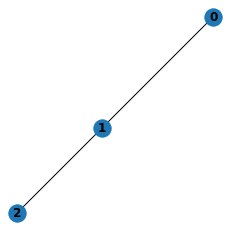

In [ ]:
# Adjacency matrix of a graph with three vertices connected as a line
A = np.array([[0,1,0],[1,0,2],[0,2,0]])
print("Adjacency matrix :")
print(A)
#the SDP problem is solved with the Laplacian matrix
L = Laplacien(A)
X = solve_sdp_maxcut(L)
#We can then run the GW algorithm with the solution X
print("Vector of the cut : {}".format(GW_algo(V(X), L)))

plt.figure(figsize=(3,3))
draw_graph_from_np(A)

We observe that the GW algorithm give finally the good cuts (one vertice a vertex of the graph belongs to one side of the cut if it is 1 and to the other if it is -1). We now test the GW algorithm for a graph with a random adjacency matrix:

In [ ]:
# Adjacency matrix of a graph with n vertices and a random adjacency matrix
n = 6
A = np.random.randn(n, n)
#delete the weighs for the edges between a same vertex
for i in range(len(A)):
    A[i][i] = 0
#make the adjacency matrix symetric
for i in range(len(A)):
    for j in range(i,len(A)):
        A[i][j] = A[j][i]
print("Adjacency matrix :")
print(A)
#the SDP problem is solved with the Laplacian matrix
L = Laplacien(A)
X = solve_sdp_maxcut(L)
#We can then run the GW algorithm with the solution X
print("Vector of the cut : {}".format(GW_algo(V(X), L)))

Adjacency matrix :
[[ 0.         -1.34991881 -2.56744235 -1.02561188 -0.12621858  0.23677004]
 [-1.34991881  0.         -1.18684581  0.93404123  0.128577    0.48067225]
 [-2.56744235 -1.18684581  0.         -0.73383814 -0.79004163 -0.40545759]
 [-1.02561188  0.93404123 -0.73383814  0.          0.53070161  0.0777178 ]
 [-0.12621858  0.128577   -0.79004163  0.53070161  0.         -0.63667815]
 [ 0.23677004  0.48067225 -0.40545759  0.0777178  -0.63667815  0.        ]]
Vector of the cut : [ 1 -1  1  1  1  1]


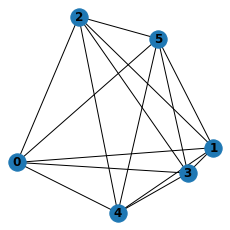

In [ ]:
plt.figure(figsize=(3,3))
draw_graph_from_np(A)

### 3.1.3 Performance guarantee of the algorithm         

The geometrical intuition we introduced above also has an interesting feature : the expectation value of the solution $\xi$ of (GW95) has a simple form.        

Using the (MC) form we introduced in part 3.1.1 and acknowledging that $\mathbb{P}(\xi_i \neq \xi_j) = \frac{\arccos(v_i^T v_j)}{\pi}$, we can write the expectation value of the (GW95) algorithm's solution $\xi$ as :

\begin{equation}
\label{esp_gw95}
    \mathbb{E}\left( \sum\limits_{ij \in E} a_{ij} \frac{1 - \xi_i\xi_j}{2} \right) = \sum\limits_{ij \in E} a_{ij} \frac{\arccos{v_i^T v_j}}{\pi}
\end{equation}          

Now, as we do not know the optimal solution to (MC), to estimate the performance of the (GW95) result we need to find a relation between the expectation find above and the optimal solution of the SDP program.       

Now, let us denote $z_{mc}^*$ the optimal value of the Max-Cut, $z_{sdp}^*$ the optimal value of the relaxation.       
If $A \geq 0$, on average, the algorithm delivers a solution of value at least 0.88 times the optimal value.

\begin{equation}
\label{qual_gw95}
    \mathbb{E}[GW95] > 0.87856 z_{sdp}^* > 0.87856 z_{mc}^*
\end{equation}        

The intuition behind the constant 0.87856 comes from the comparison of the functions used along the way it is to say : $\frac{1}{\pi} \arccos(x)$ and $\frac{1 - x}{2}$. By plotting both function over $[-1, 1]$, Goemans and Williamson in \[GW\] notes that : $$ \frac{1}{\pi} \arccos(x) > 0.87856 \frac{1 - x}{2} $$
The performance guarantee then derives from using this result in (MC) and the equality on the expectation above.


**REFERENCE**    

\[GW\] M.X. Goemans and D.P. Williamson. Improved approximation algorithms for maximum cut and satisfiability problems using semidefinite programming. Journal of the ACM, 42:1115–1145, 1995.

## 3.2 Graph coloring
### 3.2.1 SDP Relaxation - Chromatic number

Let $G$ be a graph and $(V_1, \dots, V_k)$ be a $k$-partition of its vertex set $V(G)$. We recall that a vertex set $V_i$ is stable if the vertices in $V_i$ are pairwise nonadjacent.      
Now, a $k$-coloring of $G$ is such that each $V_i$ of the $k$-partition is stable.      

With that in mind, we define the quantity of interest the chromatic number  : $\chi(G)$ is the smallest value $k$ such that $G$ has a $k$-coloring.           

Now using the idea we introduced in 1.1, let us model the $k$-partition of the vertex set by characteristic vectors $s_i \in \{ 0, 1 \}^n$ where $(s_i)_u$ if $u \in V_i$          

We now, following the idea of 1.2, introduce the partition matrix \eqref{eqn: pmat} associated to the $k$-partition $ (V_1, \dots, V_k) $ :    

\begin{equation}
\tag{PMat}
\label{eqn: pmat}
    M = \sum_i s_i s_i^T
\end{equation}      

Now, just as in 3.1.1, a way to model the objective $\chi(G)$ is through the following result on $M$.       
Let M be a symmetric $0, 1$ matrix, $M$ is a $k$-partition matrix if and only if :      

$\text{Diag}(M) = e$, $\text{rank}(M) = k$ and $M \succeq 0$        

To get a sense of where this result is coming from, let us check that the partition matrix we introduced earlier is indeed satisfying the rank condition for example.       

First, just looking at \eqref{eqn: pmat} formula it is obvious that $M$ is a symmetric $0, 1$ matrix.           
Now, we note that $s_i \neq 0_{1\times n}$ for any $V_i$ in the partition and that if $u \in V_i$, $(s_{j \neq i})_u = 0$, $M$ being derived from a $k$-partition giving us $\text{rank}(M) = k$       

Rest of the proof to get the equivalence is available in Rendl's paper.          

Some other arguments that we are not reviewing here allows to refine the precedent equivalence result on $M$ and notably to get rid of the non-convex rank constraint and semidefiniteness of $M$. Instead, we now have :       
let M be a symmetric $0, 1$ matrix, $M$ is a $k$-partition matrix if and only if :       

$\text{Diag}(M) = e$ and $\left( tM - J \succeq 0 \iff t \geq k \right)$, where $J$ is the all-ones matrix                

Using those two results, we now write our objective as the following SDP program:       

\begin{equation}
    \tag{$\chi(G)$ SDP bin}
    \label{chrom_1}
    \chi(G) = \min\{ t : tM - J \succeq 0; \text{Diag}(M) = e; m_{ij} = 0, \forall ij \in E(G); m_{ij} \in \{ 0, 1 \}\}
\end{equation}


### 3.2.2 Hyperplane rounding for Graph coloring

As the hyperplane rounding algorithm used for Max-Cut we will now dive into an approach used for the graph-coloring problem.       
The graph-coloring problem consists in assigning a color to each \{ vertex, edge \} of a graph such that no two adjacent \{ vertices, edge \} are of the same color.           

This problem too is NP-hard and as such non trivial bounds for the number of colors are often hard to get let alone $\chi(G)$. In 1983, Widgerson focused on the particular set-up of three-colorable graphs and ended up with an algorithm coloring any three-colorable graph on $n$ vertices with at most $3\sqrt{n}$ .          

The choice of three-colorable graphs was not haphazard. Indeed Widgerson used the two following facts : 
-  for any $v$ in $V(G)$ where $G$ is such that $\chi(G) = 3$ then $N(v)$ is a bipartite graph therefore colorable with at most two colors (see \[1\])
- if $G$ has a maximum vertex degree $\Delta$ then $G$ can be colored in polynomial time with $\Delta + 1$ colors

We quickly recall that the neighbourhood $N(v)$ of a vertex $v \in V(G)$ is the set of all vertices adjacent to $v$ and that the vertex degree $\Delta$ of a vertex $v$ is the number of edges that are incident to $v$         

In [ ]:
# Implementation of some basic functions related to graphs:

def degres(A):
    """
    return: the list of the degres of each vertex of the graph with adjacency matrix A
    """
    return np.sum(1*(A!=0), axis=1)

def degre_max(A):
    """
    return: the vertex with maximum degre and the maximum degre
    """
    return np.argmax(degres(A)), np.max(degres(A))

def voisins(A, k):
    """
    return: the neighbours of the vertex k for a graph with adjacency matrix A
    """
    return [i for i in range(len(A)) if A[k][i]>0]

Those 2 facts in mind, Widgerson suggests to use the the property 1 stated above and to color the neighbourhood of a vertex of $G$ with only two colors. Furthermore, if the maximum vertex degree $\Delta$ is such that $\Delta > \sqrt{n}$, then, abiding by the constraints of the problem, one can color at least $\sqrt{n}$ vertices with only two colors.            
The rest is backed by the second property stated above. The whole algorithm is now the following :      

**Widgerson Algorithm for three-colorable graphs**

*Input* 
- $G$ a graph on $n$ vertices such that $\chi(G) = 3$     

*Algorithm*
- While there exists a vertex $v$ in $G$ with degree $\Delta \geq \sqrt{n}$ : 
        - Color $v$ with color 1 and $N(v)$ with at most two new colors
        - Remove $v$ and its neighbourhood from $G$ - new graph is still called $G$
    
- When all the remaining vertices are of degree $\Delta < \sqrt{n}$ color $G$ with at most $\Delta$ colors    

*Output* 
- A coloring of $G$ with at most $3\sqrt{n}$ colors

We will now implement this algorithm.    
To verify the functioning of our coloring algorithms, we define a function that check that there are not any monochromatic egde:

In [ ]:
def check_coloring(A, colors):
    """
    Giving a graph and a coloring, check if the coloring is fine
    (i.e. if there are not neighboors with same color)

    A: matrice d'adjacence du graphe
    colors: couleurs associées à chaque sommet

    return: booléen indiquant si le coloring est correct (True) ou non (False)
    """
    n = len(A)

    for i in range(n):
        for j in range(n):
            if A[i][j] > 0:
                if colors[i]==colors[j]:
                    return False

    return True

The following simple function allow to color a 2-colorable graph with two colors. It will be helpful when defining the Widgerson algorithm later. Indeed, the subgraph of the neighbours of a vertex in a 3-colorable graph is a 2-colorable graph and we can use the following algorithm to 2-color it:

In [ ]:
def two_color(A, deux_couleurs=[1,2]):
    """
    Color with two colors a 2-colorable graph

    A: Adjacency matrix of the 2-colorable graph
    deux_couleurs: list of two colors (ints) to use

    return: coloring, i.e. list of the used colors for each vertex
    and number of used colors (1 or 2)
    """
    n = len(A)
    nb_couleurs_utilisees = 1
    couleurs = np.zeros(n)
    sommet = 0
    index_couleur = 0

    while True:

        couleurs[sommet] = deux_couleurs[index_couleur]

        neighbours_to_be_colored = [i for i in range(n) if A[sommet][i]>0 and couleurs[i]==0]
        if len(neighbours_to_be_colored) > 0:
            sommet = neighbours_to_be_colored[0]
            index_couleur = 1-index_couleur
            nb_couleurs_utilisees = 2
        elif np.any(couleurs==0):
            sommet = np.argmax(couleurs==0)                   
        else:
            break

    return couleurs, nb_couleurs_utilisees

Let G be a graph with maximum vertex degree $\Delta$. Then G can be colored in polynomial time with $\Delta+1$ colors. as stated above.  
The following greedy algorithm make this lemma in practice:

In [ ]:
def greedy_color(A, min_couleur=1):
    """
    Color with at most degre_max+1 colors with a greedy method

    A: Adjacency matrix of the graph to be colored
    min_couleur: int of the first color to be used

    return: coloring, list of the used colors for each vertex
    starting with the color int min_couleur
    with a greedy method (at most degre_max+1 colors)
    """
    n = len(A)
    sommet_max, degre_max_ = degre_max(A)
    couleurs = np.zeros(n)
    couleurs_possibles = list(range(min_couleur, min_couleur+degre_max_+1))

    for sommet in range(n):
        couleurs_voisins = set(couleurs[voisins(A, sommet)])
        couleurs_possibles_sommet = [couleur for couleur in couleurs_possibles if (couleur not in couleurs_voisins)]
        couleurs[sommet] = couleurs_possibles_sommet[0]
                                     
    return couleurs

We can now define the Widgerson algorithm to color a 3-colorable graph with at most $3\sqrt{n}$ colors:

In [ ]:
def wigderson(A):
    """
    Color a 3-colorable graph with 3sqrt(n) colors
    with the Wigderson algorithm

    A: adjacency matrix of the 3-colorable graph

    return: coloring, list of the colors (int) for each vertex
    """
    n = len(A)
    A_ = A.copy()

    #colors for each vertex (0 means not colored)
    couleur = 2
    couleurs = np.zeros(n)

    sommet_en_cours, degre_max_ = degre_max(A_)
    
    while degre_max_ >= np.sqrt(n):

        #Color the considered vertex with color 1
        couleurs[sommet_en_cours] = 1
        
        #Color its neighbours with two new colors
        voisins_ = voisins(A_, sommet_en_cours)
        couleurs[voisins_], nb_couleurs_utilisees = two_color(A_[voisins_,:][:,voisins_], deux_couleurs=[couleur+1, couleur+2])
        couleur += nb_couleurs_utilisees

        #reduce the graph (represented here with its adjacency matrix)
        #by deleting the edges for the colored vertices (allow not to consider them anymore)
        #and recompute the maximum degre and the vertex with max degre
        sommets_a_garder = [i for i in range(n)]
        A_[sommet_en_cours] = np.zeros(n)
        for voisin in voisins_:
            A_[voisin] = np.zeros(n)
        sommet_en_cours, degre_max_ = degre_max(A_)

    #color the last noncolored vertices with a greedy method
    sommets_non_colores = np.argwhere(couleurs==0).flatten()
    if len(sommets_non_colores)>0 :
        couleurs[sommets_non_colores] = greedy_color(A_[sommets_non_colores, :][:, sommets_non_colores], min_couleur=couleur)

    return couleurs

For instance, if we define a graph of four vertices forming a cycle, and we compute the coloring computed by the algorithms defined above, we get:

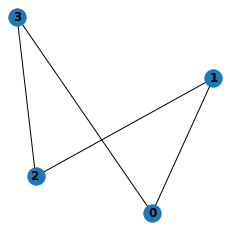

In [ ]:
# Adjacency matrix of a graph with 4 vertices forming a cycle
A = np.array([[0,1,0,1],[1,0,1,0],[0,1,0,1],[1,0,1,0]])
plt.figure(figsize=(3,3))
draw_graph_from_np(A)

In [ ]:
check_coloring(A, two_color(A)[0])

True

In [ ]:
check_coloring(A, greedy_color(A))

True

In [ ]:
check_coloring(A, wigderson(A))

True

All these colorings are correct.

#### KMS method (Karger, 1998)

The Widgerson algorithm we just saw does not make use of the relaxation we introduced in 3.2.2 but one improvement of the algorithm does so.      

Starting back from $\chi(G)$ SDP bin, we acknowledge that the $0, 1$ condition is not tractable and introduce a new form for $M$ that can be found in the Rendl article. From this new form emerges the famous Lovasz number $\vartheta(G)$.      

The Lovasz number has a lot of different uses and relations in various graph-related NP-hard problems like finding optimal stable sets and cliques.     
Notably for the graph coloring problem $\vartheta(G)$ is a lower bound on $\chi(G)$      

$\vartheta(G)$ can be formulated as a semidefinite program and numerically approximated by the ellipsoid method in polynomial time in the number of vertices of G \[2\]


One semidefinite program for $\vartheta(G)$ is the following : 

\begin{equation}
\tag{$\vartheta(G)$ SDP}
\label{eqn: l_sdp}
\min\{ \lambda : V \succeq 0, v_{ii} = 1 \forall i, v_{ij} = \lambda \forall ij \in E(G) \}
\end{equation}      

**REFERENCES**     

- \[1\] Asratian, Armen S.; Denley, Tristan M. J.; Häggkvist, Roland (1998), Bipartite Graphs and their Applications, Cambridge Tracts in Mathematics, 131, Cambridge University Press, ISBN 9780521593458.

- \[2\]Grötschel, Martin; Lovász, László; Schrijver, Alexander (1981), The ellipsoid method and its consequences in combinatorial optimization, Combinatorica, 1 (2): 169–197, doi:10.1007/BF02579273

We implement below this form of the SDP relaxation of the graph coloring problem with the CVXPY library:

In [ ]:
def solve_sdp_graph_coloring(A):
    """
    Definition and solving of the SDP problem related to
    the SDP relaxtion of graph coloring
    (see the sdp form for lovasz number introduced above)
    
    A: square matrix, adjacency matrix of the graph
    
    return: square matrix X solution of the SDP problem
    """
    n = len(A)
    #build the matrices of the constraints
    A_cont = []
    for i in range(n):
        for j in range(n):
            if A[i][j]>0:
                A_cont_mat = np.zeros((n,n))
                A_cont_mat[i][j] = 1
                A_cont_mat = A_cont_mat.astype('float')
                A_cont.append(A_cont_mat)

    #define the SDP problem with CVXPY
    X = cp.Variable((n,n), symmetric=True)
    t = cp.Variable(1)
    constraints = [X >> 0]
    constraints += [
        X[i][i] == 1. for i in range(n)
    ]
    constraints += [
        cp.trace(A_cont[i] @ X) == t for i in range(len(A_cont))
    ]

    prob = cp.Problem(cp.Minimize(t), constraints)
    prob.solve()

    return X.value

We will now use it in a refined algorithm.     

As for the maxcut problem, we can adapt the hyperplane rounding idea to get a solution for the graph coloring problem from a solution $X$ of its SDP relaxation. It is what Karger, Motwani and Sudan proposed in 1998 adapting the idea of Goemans-Williamson.

They proposed to generate $t$ random vectors on the unit sphere. The $t$ hyperplanes constructed from these vectors define $2^t$ regions. In a similar way to Goemans-Williamson algorithm, for a well-chosen $t$, if we apply identical color to the vectors $V_i$ that are in the same region, we get a semi-coloring with a high probability, i.e. there is a subgraph of size $(n/2)$ where there are not monochromatic edges.

The KMS Algorithm combines this method with the Widgerson while-loop to get a coloring with $O(n^{0.387})$ colors.

**KMS Algorithm for three-colorable graphs**

*Input* 
- $G$ a graph on $n$ vertices such that $\chi(G) = 3$     

*Algorithm*
- While there exists a vertex $v$ in $G$ with degree $\Delta \geq n^{0.613}$ : 
        - Color $v$ with color 1 and $N(v)$ with at most two new colors
        - Remove $v$ and its neighbourhood from $G$ - new graph is still called $G$
    
- Then when the max degree $\Delta < n^{0.613}$
        - Compute the solution of the SDP relaxation of the problemwhile there exists a non-colored vertex
        - while there are still vertices in the graph :
        compute a semi-coloring from this solution with the hyperplane rounding method 
        and remove the colored vertices from the graph

*Output* 
- A coloring of $G$ with at most $O(n^{0.387})$ colors

In [ ]:
def semi_coloring_with_hyperplane_rounding(A, V_, min_couleur=1, verbose=True):
    """
    Semi-color the graph with colors
    adaptating the hyperplane rounding method of GW

    A: adjacency matrix nxn of the graph with n vertices
    V: matrix nxn such as X=VtV
    min_couleur : minimum int for the colors ints to be used

    return: coloring, list of colors (ints) for each vertex
    with zeros for the noncolored vertices
    """
    n = len(A)
    couleurs = np.zeros(n)
    nb_used_colors = 0
    sommet_max, degre_max_ = degre_max(A)

    #if there are not any edge, we can return a vector with one color only
    if degre_max_==0:
        return np.ones(n)*min_couleur, 1

    t = int(2 + np.log(degre_max_)/np.log(3))

    while (couleurs>0).sum() < (n/2):

        #generate t random vectors r on the unit sphere
        r = np.random.normal(0,1,(t,len(V_)))
        r = (r.T/np.linalg.norm(r, axis=1)).T
        #compute the dot products rTvi of each r with each vi
        rsTvis = np.dot(r, V_)

        #get vectors with 1 or 0 if vi is in a side or the other of each hyperplan
        vecteurs_hyperplans = rsTvis>=0
        #then get some unique ids of color for each region defined by the hyperplanes defined by the random vectors r
        #(put a number to each hyperplane and sum with this ponderation to get unique ids)
        couleurs = (vecteurs_hyperplans.T*np.array(range(1,t+1))).sum(axis=1)

        #delete one of the two vertices for each monochromatic edge
        for i in range(n):
            for j in range(n):
                if A[i][j]>0:
                    if couleurs[i]==couleurs[j]:
                        couleurs[i] = 0

    #reorganise the colors to get a consecutive sequence starting from min_couleur
    colors_set = set(couleurs)
    colors_set.discard(0)
    nb_used_colors = len(colors_set)
    old_colors_ints = list(colors_set)
    new_colors_ints = list(range(min_couleur, min_couleur+nb_used_colors))
    colors_transform = dict(zip(old_colors_ints, new_colors_ints))
    colors_transform[0] = 0
    couleurs = [colors_transform[couleur] for couleur in couleurs]

    return couleurs, nb_used_colors


def kms(A, verbose=True):
    """
    Color the graph with O(n^0.387) colors
    running the algorithm proposed by KMS

    A: adjacency matrix of the 3-colorable graph

    return: coloring, list of colors (ints) for each vertex
    """
    n = len(A)
    A_ = A.copy()

    #colors for each vertex (0 means not colored)
    couleur = 1
    couleurs = np.zeros(n)

    sommet_en_cours, degre_max_ = degre_max(A_)
    
    #Run the loop of the Wigderson algorithm
    #while the max degre of non colored vertices is superior to n^0.613
    while degre_max_ >= n**0.613:

        #Color the considered vertex with a new color
        couleurs[sommet_en_cours] = 1
        
        #Color the neighbours with two new colors
        voisins_ = voisins(A_, sommet_en_cours)
        couleurs[voisins_], nb_couleurs_utilisees = two_color(A_[voisins_,:][:,voisins_], deux_couleurs=[couleur+1, couleur+2])
        couleur += nb_couleurs_utilisees

        #reduce the graph (represented here with its adjacency matrix)
        #by deleting the edges for the colored vertices (allow not to consider them anymore)
        #and recompute the maximum degre and the vertex with max degre
        sommets_a_garder = [i for i in range(n)]
        A_[sommet_en_cours] = np.zeros(n)
        for voisin in voisins_:
            A_[voisin] = np.zeros(n)
        sommet_en_cours, degre_max_ = degre_max(A_)

    if verbose:
        print("End of the Widgerson loop ; current coloring :")
        print(couleurs)

    #Then use the SDP relaxation for the remaining graph...
    sommets_non_colores = np.argwhere(couleurs==0).flatten()
    if len(sommets_non_colores)>0 :
        A_sous_graphe = A_[sommets_non_colores, :][:, sommets_non_colores]

        X = solve_sdp_graph_coloring(A_sous_graphe)
    
        #...and the hyperplane rounding idea to get the colors from the solution
        V_ = V(X) #Cholesky factorisation defined above in the notebook

        #repeat the hyperplane rounding idea to get semicoloring until having colored the whole graph
        while len(sommets_non_colores)>0:
            A_non_colores = A_[sommets_non_colores, :][:, sommets_non_colores]
            V_non_colores = ((V_.T)[sommets_non_colores]).T
            couleurs[sommets_non_colores], nb_couleurs_utilisees = semi_coloring_with_hyperplane_rounding(A_non_colores, V_non_colores, min_couleur=couleur)
            couleur += nb_couleurs_utilisees
            sommets_non_colores = np.argwhere(couleurs==0).flatten()
            if verbose:
                print("New semicoloring added via hyperplane rounding ; current coloring :")
                print(couleurs)

    return couleurs

We can do a first test of the KMS algorithm with the very simple graph with 4 vertices forming a cycle we used above:

In [ ]:
A = np.array([[0,1,0,1],[1,0,1,0],[0,1,0,1],[1,0,1,0]])
coloring = kms(A)
print("coloring : {}".format(coloring))
print("The KMS algo is here " + "correct." if check_coloring(A, coloring) else "not correct.")

End of the Widgerson loop ; current coloring :
[0. 0. 0. 0.]
New semicoloring added via hyperplane rounding ; current coloring :
[2. 1. 2. 1.]
coloring : [2. 1. 2. 1.]
The KMS algo is here correct.


We define a function to draw the graph and visualize the coloring:

In [ ]:
def draw_graph_with_coloring(G, coloring):
    """
    draw graph G (networkx graph) with the colors defined in coloring (list of ints)
    """
    pos = nx.spring_layout(G)
    colors = ['red','blue','green','yellow','purple', 'orange', "black", "grey", "white", "magenta"]
    for i in range(len(coloring)):
        nx.draw_networkx_nodes(G, pos, [x for x in G.nodes() if coloring[x]==i], node_color=colors[i])
    nx.draw_networkx_edges(G, pos)
    plt.axis("off")
    plt.show()

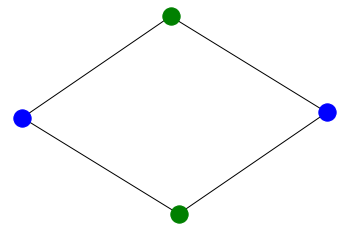

In [ ]:
draw_graph_with_coloring(nx.from_numpy_array(A), coloring)

We can also test with a graph of 9 vertices forming a cycle, because it is also 3-colorable (but not 2-colorable):

In [ ]:
#adjacency matrix of a graph with n vertices forming a cycle
n = 9
A = np.zeros((n,n))
for i in range(len(A)-1):
    A[i][i+1] = 1
    A[i+1][i] = 1
A[-1][0] = 1
A[0][-1] = 1
coloring = kms(A)
print("coloring : {}".format(coloring))
print("The KMS algo is here " + "correct." if check_coloring(A, coloring) else "not correct.")

End of the Widgerson loop ; current coloring :
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
New semicoloring added via hyperplane rounding ; current coloring :
[2. 0. 2. 0. 2. 0. 2. 1. 0.]
New semicoloring added via hyperplane rounding ; current coloring :
[2. 3. 2. 3. 2. 3. 2. 1. 3.]
coloring : [2. 3. 2. 3. 2. 3. 2. 1. 3.]
The KMS algo is here correct.


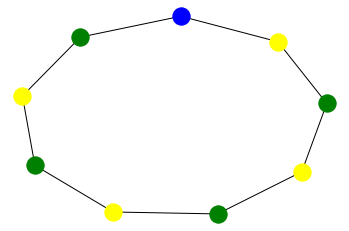

In [ ]:
draw_graph_with_coloring(nx.from_numpy_array(A), coloring)

We cannot use a graph with any random adjacency matrix because the graph has to be 3-colorable to make the KMS algorithm valid ; thus we chose to test here with the Petersen graph (https://en.wikipedia.org/wiki/Petersen_graph) that has 10 vertices and 15 edges and that is known to be 3-colorable :

In [ ]:
petersen = nx.petersen_graph()
A_petersen = np.array(nx.adjacency_matrix(petersen).todense())
coloring = kms(A_petersen)
print("coloring : {}".format(coloring))
print("The KMS algo is here " + "correct." if check_coloring(A_petersen, coloring) else "not correct.")

End of the Widgerson loop ; current coloring :
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
New semicoloring added via hyperplane rounding ; current coloring :
[1. 3. 2. 0. 4. 0. 2. 0. 4. 3.]
New semicoloring added via hyperplane rounding ; current coloring :
[1. 3. 2. 5. 4. 0. 2. 5. 4. 3.]
New semicoloring added via hyperplane rounding ; current coloring :
[1. 3. 2. 5. 4. 6. 2. 5. 4. 3.]
coloring : [1. 3. 2. 5. 4. 6. 2. 5. 4. 3.]
The KMS algo is here correct.


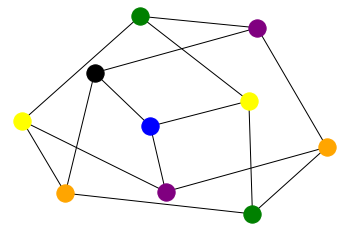

In [ ]:
draw_graph_with_coloring(petersen, coloring)

# 4  Interior Points methods for SDP programming and more

# 4. Solving SDP in practice

Now that we have seen different SDP relaxations, we explore some methods to efficiently solve SDP programs.

## 4.1 Interior Point algorithms

From Chapter 5 in class we saw that barrier methods which are iterating inside the polytope of constraints are very efficient to solve SDP programs.      

Inspired by the demonstration page 20 in Chapter 5, we recall the primal and dual problems introduced in section 2.     

\begin{equation}
    \tag{P}
    \label{primal_5}
    \begin{split}
    &\min \langle C, X \rangle \\
    &\text{ such that } A(X) = b, X \succeq 0
    \end{split}
\end{equation} 

\begin{equation}
    \tag{D}
    \label{dual_5}
    \begin{split}
    &\max b^T y \\
    &\text{ such that } Z = C - A^T(y) \succeq 0
    \end{split}
\end{equation}
where the linear operator $A$ has been introduced in section 2      

Looking back to section 2, under the *Slater's* condition we acknowledge that $(X, y, Z)$ is optimal when $Z = C - A^T(y) \succeq 0, A(X) = b, ZX - \mu I = 0$ and $\langle Z, X \rangle = 0$ this last condition being a consequence of the strong duality discussed $0 = z_p - z_d = \langle Z, X \rangle$        

From there, the primal-dual interior points method is derived from the convex optimization problem called the primal barrier problem where a logarithmic barrier controlled by a parameter $\mu$ is added to (Primal).      

The constraints are then the following :      

\begin{equation}
    \tag{PD$_{\mu}$}
    \label{cond_pdp}
    Z = C - A^T(y) \succeq 0, A(X) = b, ZX - \mu I = 0
\end{equation}       

Whole details of the procedure to get \eqref{cond_pdp} can be found in Rendl's paper.        

We acknowledge that there is an equivalence between (Primal) and (Dual) having stricly feasible points and \eqref{cond_pdp} having a unique solution $(X_{\mu}, y_{\mu}, Z_{\mu}), \forall \mu > 0$          

Now that we have this new program, let us recall the concept of barrier methods is to solve a sequence \eqref{cond_pdp} for different decreasing values of $\mu$ and use this sequence of results as an approximation to a solution of the initial program.       
The idea is to solve a finite number of \eqref{cond_pdp} for a decreasing sequence $\mu_k$ and use the last solution $\mu_{k_{\text{last}}}$ as an approximation to the initial problem.        
The intuition behind using only the last step is linked to the instability of Newton's method, a slightly different initialization point can yield a very different sequence of results.     

The set of solutions obtained $CP := \{P_{\mu} = (X_{\mu}, y_{\mu}, Z_{\mu}) : \mu > 0 \}$ defines a smooth curve, describing a path on the set of constraints. $CP$ is called the *central path*.

To compute SDP programming, we firstly define some utilitaries functions:

In [ ]:
def is_sdp(X):
    return np.all(np.linalg.eigvals(X) >= 0)

def proj_sdp(X):
    A = (X + X.T)/2
    eigvals, eigvecs = np.linalg.eig(A)
    eigvals[eigvals < 0] = 0

    return eigvecs.dot(np.diag(eigvals)).dot(eigvecs.T)

We now define an implementation of SDP programming solver - for the maxcut SDP relaxation problem more precisely here - through primal-dual path following Interior points method. The initial values of X, y, Z are chosen to be on the primal-dual path. At each iteration we firstly get the directions of descent as described in the article, and then we applied factors $\alpha_p$ and $\alpha_d$ to those directions in order to ensure the new matrices X and Z are semidefinite positive. We also update the value of $\mu$. The loop stops when the updates of X become low.

In [ ]:
def sdp_maxcut_interior_points(L, rho=0.5, nb_iterations=10, verbose=False):
    """
    Solve SDP programming with primal-dual path following interior points method
    for the SDP relaxation of the maxcut problem

    L: Laplacian of the ajacency matrix, parameter in the function to minimize Tr(LXt)
    rho: paramètre d'échelle dans la méthode des points intérieurs (entre 0 et 1)

    return: X, solution of the SDP problem
    """
    n = len(L)
    b = np.ones(n)*(1/4)
    #initial values of variables (see HVW97)
    X = np.eye(n)*(1/4)
    y = np.sum(np.abs(L), axis=1)*1.1
    Z = L - np.diag(y)
    mu = -np.trace(np.dot(X,Z))
    #mu = 0
    iteration = 0
    delta_X_mean = np.inf

    while (iteration<nb_iterations) and delta_X_mean>10**-7:
        iteration += 1
        if verbose:
            print("---------------------iteration : {}".format(iteration))
            print("X : {}".format(X))
            print("eigval X : {}".format(np.linalg.eigvals(X)))
            print("obj : {}".format(np.trace(np.dot(L, X.T))))
            print("mu {}".format(mu))

        Z_inv = np.linalg.inv(Z)
        Z_inv = (Z_inv+Z_inv.T)/2
        r_p = b - np.diag(X) # (42) in Rendl article
        r_d = L - np.diag(y) - Z # (43) in Rendl article
        v = r_p - np.diag(mu*Z_inv - X) + np.diag(np.dot(Z_inv, np.dot(r_d, X)))
        #v = - np.diag(mu*Z_inv - X)
        #v = - np.diag(mu*Z_inv) - b
        M = X*Z_inv
        #M = -X*Z_inv

        delta_y = np.linalg.solve(M, v) #(45) in Rendl article
        #delta_y = np.linalg.solve(M, mu*np.diag(Z_inv) - np.ones(n))
        delta_Z = r_d - np.diag(delta_y)
        #delta_Z =  -np.diag(delta_y)
        delta_X = mu*Z_inv - X - np.dot(Z_inv, np.dot(delta_Z, X))
        delta_X = (delta_X + delta_X.T)/2
        delta_Z = (delta_Z + delta_Z.T)/2

        #find alpha_p such as X+alpha_p*delta_X is SDP
        alpha_p = 1
        while not(is_sdp(X + alpha_p*delta_X)):
            alpha_p *= 0.8
        
        #find alpha_d such as Z+alpha_d*delta_Z is SDP
        alpha_d = 1
        while not(is_sdp(-(Z + alpha_d*delta_Z))):
            alpha_d *= 0.8

        #To get DP
        if alpha_p < 1:
            alpha_p = 0.95*alpha_p
        if alpha_d < 1:
            alpha_d = 0.95*alpha_d

        #update X, y and Z following the primal-dual path
        X += alpha_p*delta_X
        y += alpha_d*delta_y
        Z += alpha_d*delta_Z

        if verbose:
            print("alpha_p : {}".format(alpha_p))
            print("alpha_d : {}".format(alpha_d))
            print("delta_X : {}".format(delta_X))
            print("delta_y : {}".format(delta_y))
            print("delta_Z : {}".format(delta_Z))
            print("r_d : {}".format(r_d))
            print("r_p : {}".format(r_p))
        
        mu = -(1/n)*np.trace(np.dot(X,Z))
        #mu = rho*mu

        delta_X_mean = alpha_p*np.abs(delta_X).mean()

    return X*4

We can firstly test the function with simple adjacency matrices and compare it to the results of CVXPY library :

In [ ]:
A = np.array([[0,1],[1,0]])
L = Laplacien(A)
X = sdp_maxcut_interior_points(L, nb_iterations=10)
X_cvxpy = solve_sdp_maxcut(L)
print("The function get the solution :")
print(X)
print("The CVXPY library get the solution :")
print(X_cvxpy)
print("The function get the objective value : {}".format(np.trace(np.dot(L, X.T))))
print("The CVXPY library get the objective value : {}".format(np.trace(np.dot(L, X_cvxpy.T))))

The function get the solution :
[[ 1.         -0.99999987]
 [-0.99999987  1.        ]]
The CVXPY library get the solution :
[[ 1. -1.]
 [-1.  1.]]
The function get the objective value : 3.999999739014581
The CVXPY library get the objective value : 3.9999999999998264


In [ ]:
A = np.array([[0,1,0],[1,0,2],[0,2,0]])
L = Laplacien(A)
X = sdp_maxcut_interior_points(L, nb_iterations=10)
X_cvxpy = solve_sdp_maxcut(L)
print("The function get the solution :")
print(X)
print("The CVXPY library get the solution :")
print(X_cvxpy)
print("The function get the objective value : {}".format(np.trace(np.dot(L, X.T))))
print("The CVXPY library get the objective value : {}".format(np.trace(np.dot(L, X_cvxpy.T))))

The function get the solution :
[[ 1.         -0.99995229  0.96522052]
 [-0.99995229  1.         -0.9677266 ]
 [ 0.96522052 -0.9677266   1.        ]]
The CVXPY library get the solution :
[[ 0.99998973 -1.00013297  1.00006328]
 [-1.00013297  1.00001997 -0.99999553]
 [ 1.00006328 -0.99999553  0.99997757]]
The function get the objective value : 11.870810971099008
The CVXPY library get the objective value : 12.000252828564445


We will now test the time of the interior points method with different size of graphs n. To do this, we generate random adjacency matrix of size n:

In [ ]:
def generate_random_adj_matrix(n):
    """
    Generate a random adjacency matrix of size n
    """  
    A = (np.random.randn(n, n)>0.1)*1
    #delete the weighs of the edges between a same vertex
    for i in range(len(A)):
        A[i][i] = 0
    #make the matrix symetric
    for i in range(len(A)):
        for j in range(i,len(A)):
            A[i][j] = A[j][i]
    return A

In [ ]:
n_s = [20,50,100,200,300,400,500]
times = []

for n in n_s:
    A = generate_random_adj_matrix(n)
    L = Laplacien(A)
    t0 = time.time()
    X = sdp_maxcut_interior_points(L, nb_iterations=10)
    t1 = time.time()
    times.append(t1-t0)

We can plot the times of the method for increasing n and see an exponential dynamic that make the Interior Points method impractical for a large n and for a large number of constraints. 

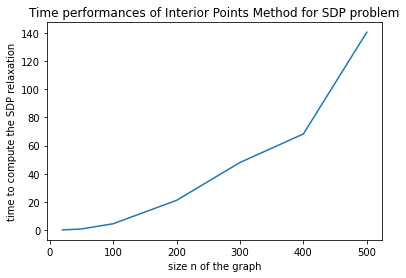

In [ ]:
plt.plot(n_s, times)
plt.xlabel("size n of the graph")
plt.ylabel("time to compute the SDP relaxation")
plt.title("Time performances of Interior Points Method for SDP problem")
plt.show()

## 4.2 Extensions and future work

Implementations showed that a limitation to the use of interior point methods was the dimension of the matrix space and the number of constraints.      

A few methods can bypass the dimension-related difficulties encountered by the interior point methods.      

When the matrix space is of reasonable dimension but the number of constraints is very large, one general idea for example is to separate the set of constraints in two different sets. One set is considered to be manageable with the interior points methods and the second set - supposedly making things too complicated - is added to the objective function through a partial Lagrangian.      

Now, using traditional techniques we end solving an SDP over the first set of constraints we kept. This is supposed to be doable with the interior point methods for example.     

We acknowledge that the solution found here can be linked to the subgradient of a function of the partial Lagrangian introduced above.     

The function there is convex but is not differentiable at some points therefore minimizing this function will make use of non smooth optimization techniques.